In [3]:
import pandas as pd
from sqlalchemy import create_engine
from googletrans import Translator


In [54]:
print("loading Renewable Energy of the city of Münster in the years 1990-2020 data....")
        #download data from here: ....... 
RenewableEnergyUrl = "https://opendata.stadt-muenster.de/sites/default/files/Muenster-Erneuerbare-Energien_2020.xls" #change the path
RenewableEnergy = pd.read_excel(RenewableEnergyUrl)
RenewableEnergy.head()
  

loading Renewable Energy of the city of Münster in the years 1990-2020 data....


,Erneuerbare Stromproduktion nach Technologie in (MWh),Photovoltaik,Windkraft,Wasserkraft,Biogasanlagen,Klär- / Deponiegas,Biomethan,Gesamt EE
0,1990,0.00000,63.2,239.8,0.0,0.0,0,303.00000
1,1995,28.01120,63.2,239.8,0.0,0.0,0,331.01120
2,2000,482.53884,63.2,239.8,0.0,11850.0,0,12635.53884
3,2005,2637.63906,21804.0,239.8,0.0,11850.0,0,36531.43906
4,2010,16953.45818,22815.2,436.0,16417.4,11850.0,0,68472.05818


In [55]:
print("loading CO2 emissions of the city of Münster in the years 1990-2021 data....")
        #download data from here: https://opendata.stadt-muenster.de/sites/default/files/Muenster-CO2-Emissionen_2021.xls
CO2emissionsUrl = "https://opendata.stadt-muenster.de/sites/default/files/Muenster-Endenergieverbrauch_2021.xls" #change the path
CO2emissions = pd.read_excel(CO2emissionsUrl)
excel_CO2emissions = pd.ExcelFile(CO2emissionsUrl)

sheet_names = excel_CO2emissions.sheet_names

loading CO2 emissions of the city of Münster in the years 1990-2021 data....


In [56]:
CO2emissions_sectors  = pd.read_excel(CO2emissionsUrl, sheet_name=0)
CO2emissions_sectors =CO2emissions_sectors.rename(columns={'CO2-Emissionen nach Sektoren in (t)': 'year'} ) #rename the CO2-Emissionen nach Sektoren into year 
CO2emissions_sectors.index.name = 'CO2 emissions according to sector in (t)' # put the dataset topic in the first(index) column

CO2emissions_sectors.head() 

,year,Private Haushalte,Gewerbe + Sonstiges,Industrie,Verkehr,Gesamt
CO2 emissions according to sector in (t),,,,,,
0,1990,817146.280496,846374.365518,293939.743986,660748.806226,2.618209e+06
1,1995,774039.745963,801725.975522,278433.678515,649866.500561,2.504066e+06
2,2000,773328.016727,800988.788810,278177.658859,638984.194897,2.491479e+06
3,2005,806450.639618,835296.157763,290092.361925,628101.889233,2.559941e+06
4,2010,684161.375550,735889.940880,185496.828653,622684.731430,2.228233e+06


In [14]:

CO2emissions_applications = pd.read_excel(CO2emissionsUrl, sheet_name=1)
CO2emissions_applications =CO2emissions_applications.rename(columns={'CO2-Emissionen nach Anwendungen in (kt)': 'year'} ) #rename the CO2-Emissionen nach applications into year 
 
CO2emissions_applications.index.name = 'CO2 emissions according to applications in (KT)' # put the dataset topic in the first(index) column

CO2emissions_applications.head(30)

,year,Wärme,Wärme in %,Strom,Strom in %,Verkehr,Verkehr in %,Gesamt,Gesamt in % zu 1990
CO2 emissions according to applications in (KT),,,,,,,,,
0,1990,1120.972590,0.000000,836.487800,0.000000,660.748806,0.000000,2618.209196,0.000000
1,1995,1055.941184,-0.058013,798.258216,-0.045703,649.866501,-0.016470,2504.065901,-0.043596
2,2000,1058.947632,-0.055331,793.546832,-0.051335,638.984195,-0.032939,2491.478659,-0.048404
3,2005,961.406123,-0.142346,970.433037,0.160128,628.101889,-0.049409,2559.941049,-0.022255
4,2010,788.078270,-0.296969,817.469876,-0.022735,622.684731,-0.057607,2228.232877,-0.148948
5,2015,744.600740,-0.335755,739.371946,-0.116100,596.134946,-0.097789,2080.107632,-0.205523
6,2016,755.325946,-0.326187,698.228113,-0.165286,598.972704,-0.093494,2052.526762,-0.216057
7,2017,768.608308,-0.314338,649.594562,-0.223426,593.667549,-0.101523,2011.870418,-0.231585
8,2018,777.881831,-0.306065,635.661057,-0.240083,588.925589,-0.108700,2002.468477,-0.235176


In [52]:
result = pd.merge(CO2emissions_sectors, CO2emissions_applications,  on='year' )
result =result.rename(columns={'Verkehr_x': 'Verkehr_Sektoren'}) #rename the CO2-Emissionen nach applications into year 
result =result.rename(columns={'Verkehr_y': 'Verkehr_Anwendungen'}) #rename the CO2-Emissionen nach applications into year 
result =result.rename(columns={'Gesamt_x': 'Gesamt_Sektoren'}) #rename the CO2-Emissionen nach applications into year 
result =result.rename(columns={'Gesamt_y': 'Gesamt_Anwendungen'}) #rename the CO2-Emissionen nach applications into year 

result = result.drop(['Verkehr in %', 'Wärme in %', 'Strom in %'], axis=1)
result = result[['year', 'Private Haushalte', 'Gewerbe + Sonstiges', 'Industrie',  'Wärme', 'Strom',  'Verkehr_Sektoren' ,'Verkehr_Anwendungen' , 'Gesamt_Sektoren' , 'Gesamt_Anwendungen', 'Gesamt in % zu 1990']]
result.dropna(inplace=True)


result.head(20)

,year,Private Haushalte,Gewerbe + Sonstiges,Industrie,Wärme,Strom,Verkehr_Sektoren,Verkehr_Anwendungen,Gesamt_Sektoren,Gesamt_Anwendungen,Gesamt in % zu 1990
0,1990,817146.280496,846374.365518,293939.743986,1120.972590,836.487800,660748.806226,660.748806,2.618209e+06,2618.209196,0.000000
1,1995,774039.745963,801725.975522,278433.678515,1055.941184,798.258216,649866.500561,649.866501,2.504066e+06,2504.065901,-0.043596
2,2000,773328.016727,800988.788810,278177.658859,1058.947632,793.546832,638984.194897,638.984195,2.491479e+06,2491.478659,-0.048404
3,2005,806450.639618,835296.157763,290092.361925,961.406123,970.433037,628101.889233,628.101889,2.559941e+06,2559.941049,-0.022255
4,2010,684161.375550,735889.940880,185496.828653,788.078270,817.469876,622684.731430,622.684731,2.228233e+06,2228.232877,-0.148948
5,2015,636894.098977,629441.403926,217637.183252,744.600740,739.371946,596134.946082,596.134946,2.080108e+06,2080.107632,-0.205523
6,2016,607277.947909,632025.211201,214250.898995,755.325946,698.228113,598972.703684,598.972704,2.052527e+06,2052.526762,-0.216057
7,2017,578793.984793,623804.379543,215604.505102,768.608308,649.594562,593667.548910,593.667549,2.011870e+06,2011.870418,-0.231585
8,2018,588419.949975,592654.296510,232468.641927,777.881831,635.661057,588925.588842,588.925589,2.002468e+06,2002.468477,-0.235176
9,2019,533848.636234,549176.926239,225833.358416,707.314749,601.544172,582527.299609,582.527300,1.891386e+06,1891.386220,-0.277603


In [53]:
 
result.to_sql("CO2emissionsAndRenewableEnergy", 'sqlite:///CO2emissionsRenewableEnergy.sqlite',if_exists='replace', index=False)


12

Index(['year', 'Private Haushalte', 'Gewerbe + Sonstiges', 'Industrie',
       'Verkehr_x', 'Gesamt_x', 'Wärme', 'Wärme in %', 'Strom', 'Strom in %',
       'Verkehr_y', 'Verkehr in %', 'Gesamt_y', 'Gesamt in % zu 1990'],
      dtype='object')


In [51]:
def translate_ClmName(NameOfTheClm): # Function to translate the columns from german to english using googletrans library
    
    translation = Translator().translate(NameOfTheClm, dest='en')
    return translation.text


tranClm = result.columns 
print(tranClm)

tranClm = [translate_ClmName(col) for col in tranClm]
print(tranClm)


Index(['year', 'Private Haushalte', 'Gewerbe + Sonstiges', 'Industrie',
       'Wärme', 'Strom', 'Verkehr_Sektoren', 'Verkehr_Anwendungen',
       'Gesamt_Sektoren', 'Gesamt_Anwendungen', 'Gesamt in % zu 1990'],
      dtype='object')


TypeError: Translator.__init__() missing 1 required positional argument: 'to_lang'

Index(['year', 'Private Haushalte', 'Gewerbe + Sonstiges', 'Industrie',
       'Wärme', 'Strom', 'Verkehr_Sektoren', 'Verkehr_Anwendungen',
       'Gesamt_Sektoren', 'Gesamt_Anwendungen', 'Gesamt in % zu 1990'],
      dtype='object')
['year', 'Private Haushalte', 'Gewerbe + Sonstiges', 'Industrie', 'Wärme', 'Strom', 'Verkehr_Sektoren', 'Verkehr_Anwendungen', 'Gesamt_Sektoren', 'Gesamt_Anwendungen', 'Gesamt in % zu 1990']


In [415]:
# the second sheet at 1 (CO2-Emissionen according to aplication)

#CO2emissions.rename(columns={'CO2-Emissionen nach Sektoren in (t)': 'year'} ) #rename the CO2-Emissionen nach Sektoren into year 
#CO2emissions.index.name = 'Emissionen nach Anwendungen in (kt)' # put the dataset topic in the first(index) column
#CO2emissions.head() 

In [18]:
# the second sheet at 1 (CO2-Emissionen according to aplication)

CO2emissions_applications = pd.read_excel(CO2emissionsUrl, sheet_name=1)
CO2emissions_applications =CO2emissions_applications.rename(columns={'CO2-Emissionen nach Anwendungen in (kt)': 'year'} ) #rename the CO2-Emissionen nach applications into year 

CO2emissions_applications.columns = [translate_ClmName(col) for col in CO2emissions_applications.columns]
 
CO2emissions_applications.index.name = 'CO2 emissions according to applications in (KT)' # put the dataset topic in the first(index) column
#CO2emissions_applications.reset_index(drop=False, inplace=True)

CO2emissions_applications.head(30)



AttributeError: 'NoneType' object has no attribute 'group'

In [437]:
#CO2emissions1.insert(0, 'CO2-Emissionen nach Anwendungen in (kt)', CO2emissions1.index)



In [19]:
CO2emissions_energy_and_sectors = pd.read_excel(CO2emissionsUrl, sheet_name=2)

CO2emissions_energy_and_sectors.columns = [translate_ClmName(col) for col in CO2emissions_energy_and_sectors.columns]

CO2emissions_energy_and_sectors.head(30)

AttributeError: 'NoneType' object has no attribute 'group'

In [481]:
 
RenewableEnergy.columns = [translate_ClmName(col) for col in RenewableEnergy.columns]
RenewableEnergy = RenewableEnergy.rename(columns={'Renewable electricity production according to technology in (MWh)': 'year'} )
RenewableEnergy.index.name = 'Renewable electricity production according to technology in (MWh)' # put the dataset topic in the first(index) column

RenewableEnergy.head(30)
 

,year,Photovoltaic,Wind power,Hydropower,Biogas plants,CLOSS / DEPONIAGAS,Biomethan,Overall one
Renewable electricity production according to technology in (MWh),,,,,,,,
0,1990,0.00000,63.20,239.8,0.0,0.00,0,303.00000
1,1995,28.01120,63.20,239.8,0.0,0.00,0,331.01120
2,2000,482.53884,63.20,239.8,0.0,11850.00,0,12635.53884
3,2005,2637.63906,21804.00,239.8,0.0,11850.00,0,36531.43906
4,2010,16953.45818,22815.20,436.0,16417.4,11850.00,0,68472.05818
5,2015,36430.82880,34406.08,436.0,44952.2,12290.20,14816,143331.30880
6,2016,37358.18730,34456.64,436.0,44952.2,15708.24,23218,156129.26730
7,2017,39083.18440,55059.84,436.0,44952.2,15414.22,12059,167004.44440
8,2018,42910.06126,60545.60,436.0,44952.2,15617.32,20490,184951.18126


In [21]:
RenewableEnergy.head(30)


,Erneuerbare Stromproduktion nach Technologie in (MWh),Photovoltaik,Windkraft,Wasserkraft,Biogasanlagen,Klär- / Deponiegas,Biomethan,Gesamt EE
0,1990,0.00000,63.20,239.8,0.0,0.00,0,303.00000
1,1995,28.01120,63.20,239.8,0.0,0.00,0,331.01120
2,2000,482.53884,63.20,239.8,0.0,11850.00,0,12635.53884
3,2005,2637.63906,21804.00,239.8,0.0,11850.00,0,36531.43906
4,2010,16953.45818,22815.20,436.0,16417.4,11850.00,0,68472.05818
5,2015,36430.82880,34406.08,436.0,44952.2,12290.20,14816,143331.30880
6,2016,37358.18730,34456.64,436.0,44952.2,15708.24,23218,156129.26730
7,2017,39083.18440,55059.84,436.0,44952.2,15414.22,12059,167004.44440
8,2018,42910.06126,60545.60,436.0,44952.2,15617.32,20490,184951.18126
9,2019,47745.49056,60545.60,436.0,44952.2,15617.32,17479,186775.61056


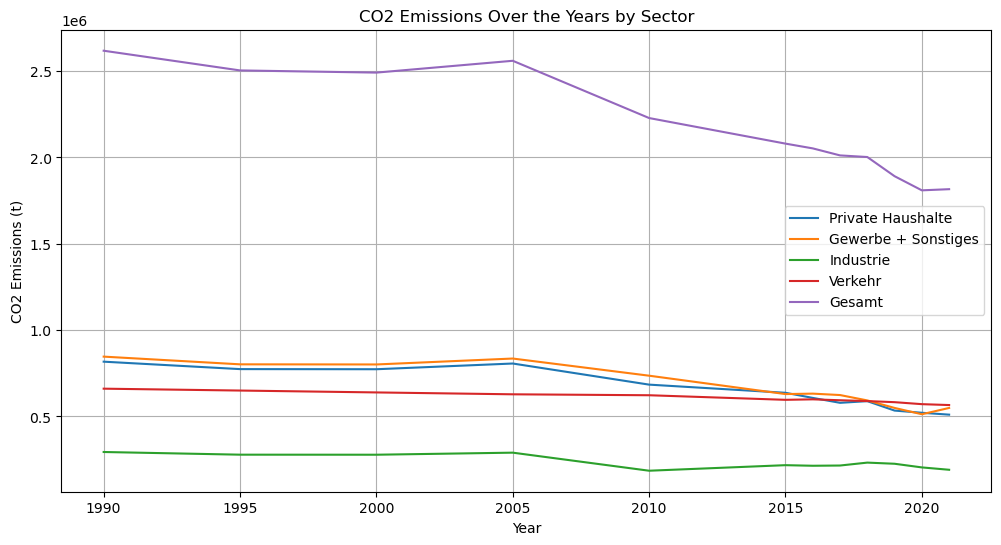

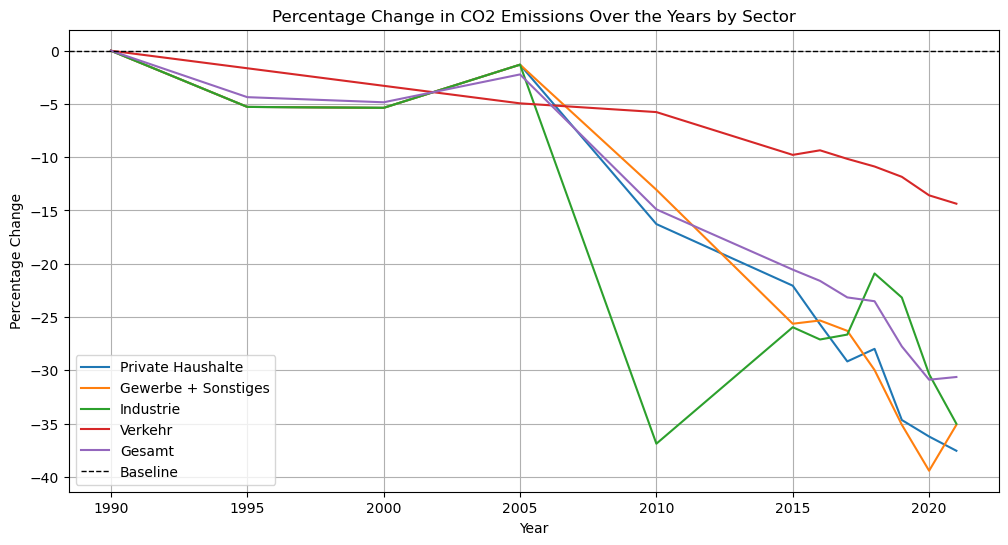

In [471]:
import matplotlib.pyplot as plt


# 1. Trend Analysis - Plot CO2 emissions for each sector over the years
#sectors = ['Private households', 'Trade + Other', 'Industry', 'Traffic', 'In total']
sectors = ['Private Haushalte', 'Gewerbe + Sonstiges', 'Industrie', 'Verkehr', 'Gesamt']

plt.figure(figsize=(12, 6))

for sector in sectors:
    plt.plot(CO2emissions_sectors['year'], CO2emissions_sectors[sector], label=sector)

plt.title('CO2 Emissions Over the Years by Sector')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (t)')
plt.legend()
plt.grid(True)
plt.show()

# 2. Calculate the percentage change in emissions compared to a baseline year
baseline_year = 1990
for sector in sectors:
    CO2emissions_sectors[f'{sector} % Change'] = (CO2emissions_sectors[sector] / CO2emissions_sectors.loc[CO2emissions_sectors['year'] == baseline_year, sector].values[0] - 1) * 100

# 3. Comparison between Sectors - Compare contributions and analyze changes over time
plt.figure(figsize=(12, 6))

for sector in sectors:
    plt.plot(CO2emissions_sectors['year'], CO2emissions_sectors[f'{sector} % Change'], label=sector)

plt.axhline(0, color='black', linestyle='--', linewidth=1, label='Baseline')
plt.title('Percentage Change in CO2 Emissions Over the Years by Sector')
plt.xlabel('Year')
plt.ylabel('Percentage Change')
plt.legend()
plt.grid(True)
plt.show()


In [472]:
CO2emissions.corr()

,year,Private Haushalte,Gewerbe + Sonstiges,Industrie,Verkehr,Gesamt
year,1.000000,-0.933956,-0.926092,-0.834566,-0.973993,-0.946746
Private Haushalte,-0.933956,1.000000,0.988523,0.837870,0.961706,0.996677
Gewerbe + Sonstiges,-0.926092,0.988523,1.000000,0.793525,0.963301,0.991300
Industrie,-0.834566,0.837870,0.793525,1.000000,0.789626,0.858254
Verkehr,-0.973993,0.961706,0.963301,0.789626,1.000000,0.969388
Gesamt,-0.946746,0.996677,0.991300,0.858254,0.969388,1.000000


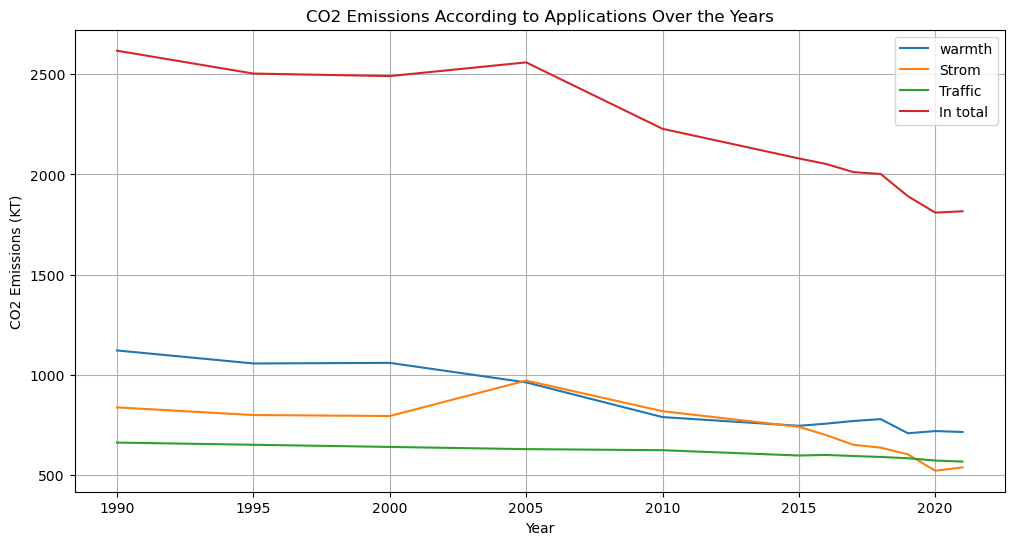

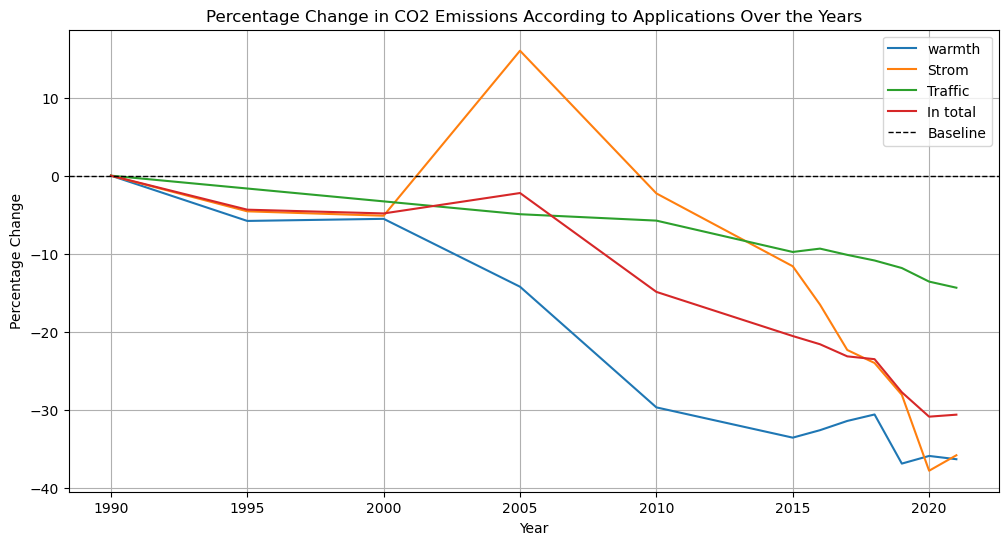

            warmth       Strom     Traffic     In total
count    12.000000   12.000000   12.000000    12.000000
mean    847.584651  716.459884  608.126463  2172.170998
std     154.880938  134.039349   31.183807   298.312662
min     707.314749  520.173520  565.862335  1809.540752
25%     738.032110  627.131836  587.326017  1974.697913
50%     773.245070  718.800029  597.553825  2066.317197
75%     985.039888  803.061131  630.822466  2494.625470
max    1120.972590  970.433037  660.748806  2618.209196


In [474]:
 

# Assuming you have loaded the CO2 emissions data into a DataFrame called df_applications


# 1. Line Plot for CO2 Emissions Over the Years
plt.figure(figsize=(12, 6))

# Plotting CO2 emissions for each application
applications = ['warmth', 'Strom', 'Traffic', 'In total']
for app in applications:
    plt.plot(CO2emissions_applications['year'], CO2emissions_applications[app], label=app)

plt.title('CO2 Emissions According to Applications Over the Years')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (KT)')
plt.legend()
plt.grid(True)
plt.show()

# 2. Percentage Change Analysis
# Calculate the percentage change compared to a baseline year (e.g., 1990)
baseline_year = 1990
for app in applications:
    CO2emissions_applications[f'{app} % Change'] = (CO2emissions_applications[app] / CO2emissions_applications.loc[CO2emissions_applications['year'] == baseline_year, app].values[0] - 1) * 100

# Line plot for percentage change
plt.figure(figsize=(12, 6))

for app in applications:
    plt.plot(CO2emissions_applications['year'], CO2emissions_applications[f'{app} % Change'], label=app)

plt.axhline(0, color='black', linestyle='--', linewidth=1, label='Baseline')
plt.title('Percentage Change in CO2 Emissions According to Applications Over the Years')
plt.xlabel('Year')
plt.ylabel('Percentage Change')
plt.legend()
plt.grid(True)
plt.show()

# 3. Summary Statistics
# Display summary statistics for each application
summary_stats = CO2emissions_applications[applications].describe()
print(summary_stats)
  


In [482]:
RenewableEnergy = RenewableEnergy.rename(columns={'Renewable electricity production according to technology in (MWh)': 'year'} )


In [483]:
print(RenewableEnergy.columns)
print(RenewableEnergy.head())

Index(['year', 'Photovoltaic', 'Wind power', 'Hydropower', 'Biogas plants',
       'CLOSS / DEPONIAGAS', 'Biomethan', 'Overall one'],
      dtype='object')
                                                    year  Photovoltaic  \
Renewable electricity production according to t...                       
0                                                   1990       0.00000   
1                                                   1995      28.01120   
2                                                   2000     482.53884   
3                                                   2005    2637.63906   
4                                                   2010   16953.45818   

                                                    Wind power  Hydropower  \
Renewable electricity production according to t...                           
0                                                         63.2       239.8   
1                                                         63.2       239.8   
2            

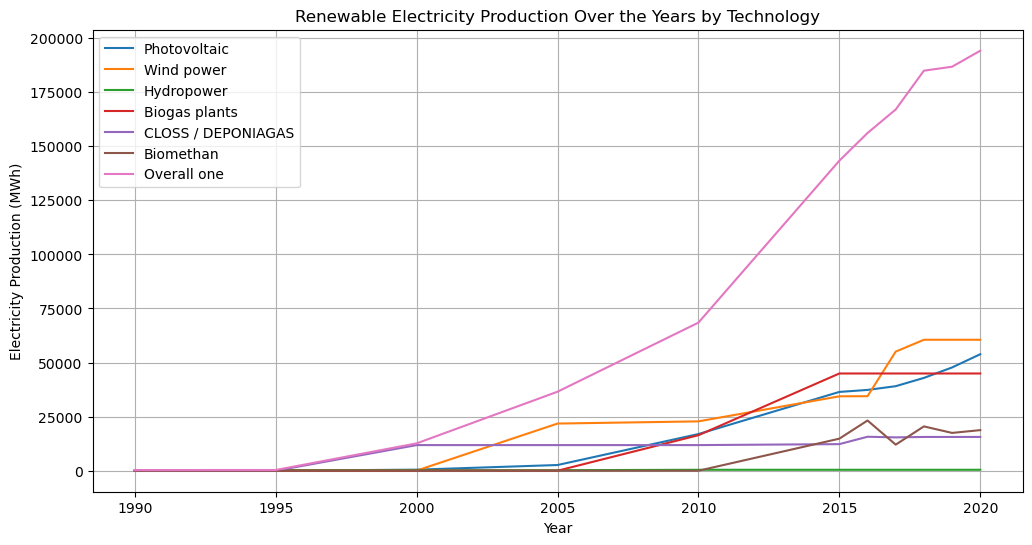

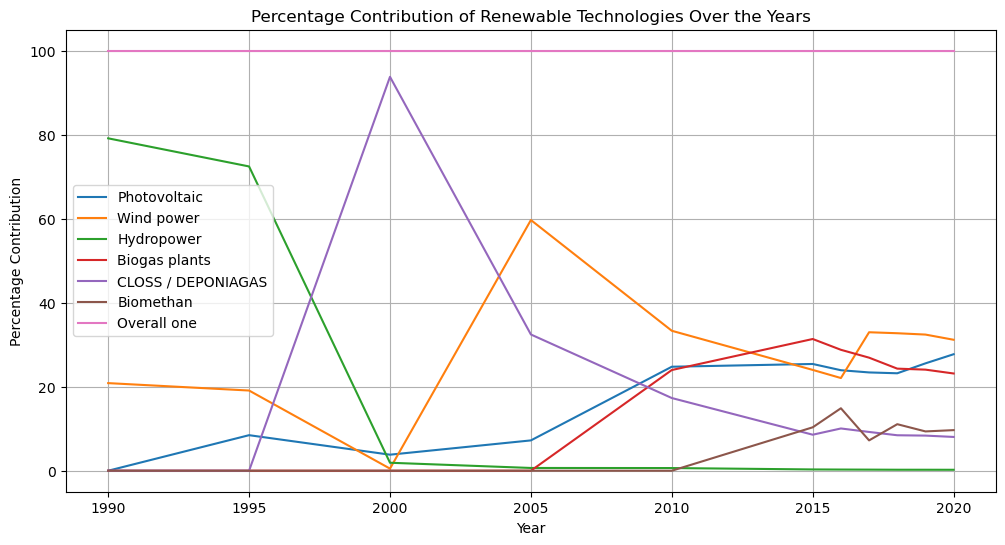

       Photovoltaic    Wind power  Hydropower  Biogas plants  \
count     11.000000     11.000000   11.000000      11.000000   
mean   25226.090873  31851.650909  364.654545   26011.872727   
std    21369.556141  24972.162157   98.987801   22250.707812   
min        0.000000     63.200000  239.800000       0.000000   
25%     1560.088950  10933.600000  239.800000       0.000000   
50%    36430.828800  34406.080000  436.000000   44952.200000   
75%    40996.622830  57802.720000  436.000000   44952.200000   
max    53857.600000  60545.600000  436.000000   44952.200000   

       CLOSS / DEPONIAGAS     Biomethan    Overall one  
count           11.000000     11.000000      11.000000  
mean         11437.692727   9711.727273  104603.689055  
std           5910.470251   9716.329442   80887.917908  
min              0.000000      0.000000     303.000000  
25%          11850.000000      0.000000   24583.488950  
50%          12290.200000  12059.000000  143331.308800  
75%          15617.32000

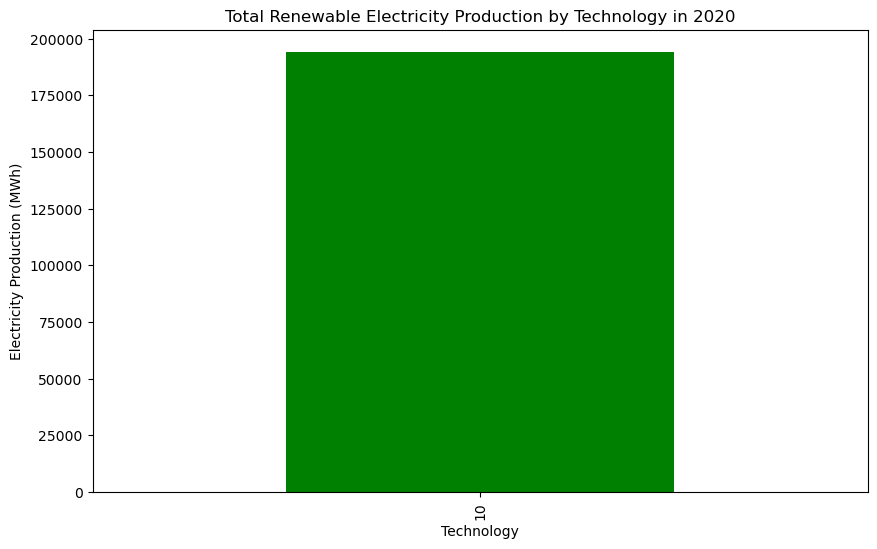

In [488]:
 

 
# 1. Line Plot for Renewable Electricity Production Over the Years
plt.figure(figsize=(12, 6))

# Plotting renewable electricity production for each technology
technologies = ['Photovoltaic', 'Wind power', 'Hydropower', 'Biogas plants', 'CLOSS / DEPONIAGAS', 'Biomethan', 'Overall one']
#technologies = ['Photovoltaic', 'Windkraft', 'Wasserkraft', 'Biogasanlagen', 'Klär- / Deponiegas', 'Biomethan', 'Gesamt EE']

for tech in technologies:
    plt.plot(RenewableEnergy['year'], RenewableEnergy[tech], label=tech)

plt.title('Renewable Electricity Production Over the Years by Technology')
plt.xlabel('Year')
plt.ylabel('Electricity Production (MWh)')
plt.legend()
plt.grid(True)
plt.show()

# 2. Percentage Contribution Analysis
# Calculate the percentage contribution of each technology to the overall production
total_production = RenewableEnergy['Overall one']
for tech in technologies:
    RenewableEnergy[f'{tech} % Contribution'] = (RenewableEnergy[tech] / total_production) * 100

# Line plot for percentage contribution
plt.figure(figsize=(12, 6))

for tech in technologies:
    plt.plot(RenewableEnergy['year'], RenewableEnergy[f'{tech} % Contribution'], label=tech)

plt.title('Percentage Contribution of Renewable Technologies Over the Years')
plt.xlabel('Year')
plt.ylabel('Percentage Contribution')
plt.legend()
plt.grid(True)
plt.show()

# 3. Summary Statistics
# Display summary statistics for each technology
summary_stats = RenewableEnergy[technologies].describe()
print(summary_stats)

# 4. Bar Plot for Total Production in 2020
plt.figure(figsize=(10, 6))
total_production_2020 = RenewableEnergy.loc[RenewableEnergy['year'] == 2020, 'Overall one']
total_production_2020.plot(kind='bar', color='green')
plt.title('Total Renewable Electricity Production by Technology in 2020')
plt.xlabel('Technology')
plt.ylabel('Electricity Production (MWh)')
plt.show()


Photovoltaics is the conversion of light into electricity using semiconducting materials that exhibit the photovoltaic effect, a phenomenon studied in physics, photochemistry, and electrochemistry. The photovoltaic effect is commercially used for electricity generation and as photosensors.


In [492]:
#!/usr/bin/env python
 

import pandas as pd
from sqlalchemy import create_engine

def pipeline():


    print("Loadin Renewable Energy of the city of Münster in the years 1990-2020 data....")
        #download data from here:https://opendata.stadt-muenster.de/sites/default/files/Muenster-Erneuerbare-Energien_2020.xls
    RenewableEnergyUrl = "https://opendata.stadt-muenster.de/sites/default/files/Muenster-Erneuerbare-Energien_2020.xls" # 
    RenewableEnergy = pd.read_excel(RenewableEnergyUrl)
  

    print("Loadin CO2 emissions of the city of Münster in the years 1990-2021 data....")
        #download data from here: https://opendata.stadt-muenster.de/sites/default/files/Muenster-CO2-Emissionen_2021.xls
    CO2emissionsUrl = "https://opendata.stadt-muenster.de/sites/default/files/Muenster-CO2-Emissionen_2021.xls" # 
    CO2emissions = pd.read_excel(CO2emissionsUrl, sheet_name=None) # to add all the sheets


    #Cleaning data and removing missing values
    print("Cleaning data and removing missing values....")
    #CO2emissions.dropna(inplace=True)
    RenewableEnergy.dropna(inplace=True)

    print("Cleaning data and removing missing values [done]....")
    
    #Creating SQLite files
    print("Creating SQLite files: ")
    
    print("creating CO2emissions data table ...")
    for sheet_name, df in CO2emissions.items():
        df.to_sql(f"CO2emissions_{sheet_name}", 'sqlite:///CO2emissions_and_RenewableEnergy.sqlite', if_exists='replace', index=False)

    #CO2emissions.to_sql("CO2emissions_data", 'sqlite:///CO2emissions_and_RenewableEnergy.sqlite',if_exists='replace', index=False)
    
    print("creating RenewableEnergy data table...")
    RenewableEnergy.to_sql("RenewableEnergy", 'sqlite:///CO2emissions_and_RenewableEnergy.sqlite',if_exists='replace', index=False)
    
    print("SQLite files created successfully!")

pipeline()



Loadin Renewable Energy of the city of Münster in the years 1990-2020 data....
Loadin CO2 emissions of the city of Münster in the years 1990-2021 data....
Cleaning data and removing missing values....
Cleaning data and removing missing values [done]....
Creating SQLite files: 
creating CO2emissions data table ...
creating RenewableEnergy data table...
SQLite files created successfully!


ref: 
https://www.andrewcbancroft.com/blog/musings/make-bash-script-executable/
